# D-Heaps
<p> A generalization of binary heaps. This notebook presents the implementation of D-Heaps (both min and max), i.e, a heap with D children on all non-leaf nodes. </p>

In [10]:
from typing import List
from math import floor, ceil, log2
import time
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import logging

LOGGER = logging.getLogger(__name__)
LOGGER.setLevel(logging.CRITICAL)


class DHeap:
    """
    Generalized implementation of a heap, where all non-leaf nodes have d children
    """
    def __init__(self, A: List, num_children):
        self.A = A
        self.num_children = num_children
        self.heap_size = len(self.A)

    def __len__(self):
        return len(self.A)

    def __str__(self):
        return str(self.A[:self.heap_size])

    def __setitem__(self, idx, data):
        self.A[idx] = data

    def __getitem__(self, idx):
        return self.A[idx]

    @staticmethod
    def parent(i, num_children):
        return floor((i - 1) / num_children)

    @staticmethod
    def height(heap_size, num_children, node_idx):
        if (2 * node_idx) + 1 >= heap_size:
            return 0
        for n in range(num_children):
            if (2 * node_idx) + (n + 1) < heap_size:
                return 1 + DHeap.height(heap_size, num_children, (2 * node_idx) + (n + 1))

    @staticmethod
    def depth(node_idx, num_children):
        if node_idx == 0:
            return 0
        return 1 + DHeap.depth(DHeap.parent(node_idx, num_children), num_children)

    def max_heapify(self, i):
        current_node_level_dict = {}
        for n in range(self.num_children):
            if (2 * i) + (n + 1) < self.heap_size:
                current_node_level_dict.update({(2 * i) + (n + 1): self.A[(2 * i) + (n + 1)]})
        current_node_level_dict.update({i: self.A[i]})
        largest = max(current_node_level_dict, key=current_node_level_dict.get)
        if largest != i:
            self.A[i], self.A[largest] = self.A[largest], self.A[i]
            self.max_heapify(largest)

    def build_max_heap(self):
        """
        converts a list into a max binary heap
        """
        for i in range(floor(len(self.A) / 2), -1, -1):
            self.max_heapify(i)

    def min_heapify(self, i):
        current_node_level_dict = {}
        for n in range(self.num_children):
            if (2 * i) + (n + 1) < self.heap_size:
                current_node_level_dict.update({(2 * i) + (n + 1): self.A[(2 * i) + (n + 1)]})
        current_node_level_dict.update({i: self.A[i]})
        smallest = min(current_node_level_dict, key=current_node_level_dict.get)
        if smallest != i:
            self.A[i], self.A[smallest] = self.A[smallest], self.A[i]
            self.min_heapify(smallest)

    def build_min_heap(self):
        """
        converts a list into a min binary heap
        """
        for i in range(floor(len(self.A) / 2), -1, -1):
            self.min_heapify(i)

    @staticmethod
    def visualize_heap(heap):
        G = nx.Graph()
        # get the depth for all the nodes
        # then plot the nodes by depth
        node_depth_mappings = [[] for _ in range(ceil(log2(len(heap))))]
        for i in range(len(heap)):
            depth = DHeap.depth(i, heap.num_children)
            node_depth_mappings[depth].append(heap[i])
        x, y = (10, 15)
        for depth, mapping in enumerate(node_depth_mappings):
            if len(mapping) > 0:
                for node_idx, node in enumerate(mapping):
                    if depth > 0 and node_idx == 0:
                        x -= 0.5
                    G.add_node(node, pos=(x, y))
                    x += 0.5
                y -= 0.5

        for i, elem in enumerate(heap):
            for n in range(heap.num_children):
                if (heap.num_children * i) + (n + 1) < heap.heap_size:
                    print(f'Adding edge between {elem} and {heap[(heap.num_children * i) + (n + 1)]}')
                    G.add_edge(elem, heap[(heap.num_children * i) + (n + 1)])

        pos = nx.get_node_attributes(G, 'pos')
        nx.draw_networkx(G, pos, with_labels=True)
#         plt.show()

## Visualization for a binary max heap

max 2-heap: [44, 15, 35, 10, 8, 20, 6, 4, 9, 2, 7, 1, 5, 3]
[44, 15, 35, 10, 8, 20, 6, 4, 9, 2, 7, 1, 5, 3]
Time taken to heapify list of 14 elements: 0.0006148815155029297 seconds
Adding edge between 44 and 15
Adding edge between 44 and 35
Adding edge between 15 and 10
Adding edge between 15 and 8
Adding edge between 35 and 20
Adding edge between 35 and 6
Adding edge between 10 and 4
Adding edge between 10 and 9
Adding edge between 8 and 2
Adding edge between 8 and 7
Adding edge between 20 and 1
Adding edge between 20 and 5
Adding edge between 6 and 3


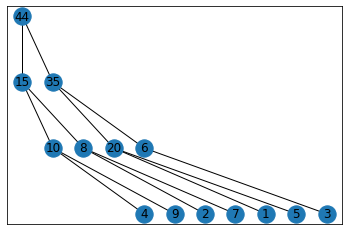

In [11]:
A = [1, 2, 3, 4, 7, 5, 6, 10, 9, 8, 15, 20, 35, 44]
start = time.time()
dheap = DHeap(A, num_children=2)
dheap.build_max_heap()
print(f'max {dheap.num_children}-heap: {str(dheap)}')
print(str(dheap))
end = time.time()
print(f'Time taken to heapify list of {len(A)} elements: {end - start} seconds')
DHeap.visualize_heap(dheap)

## Visualization for a max 10-heap
### (Heap with 10 children on all non-leaf nodes)

max 10-heap: [44, 35, 10, 15, 20, 7, 6, 1, 9, 8, 4, 2, 5, 3]
[44, 35, 10, 15, 20, 7, 6, 1, 9, 8, 4, 2, 5, 3]
Time taken to heapify list of 14 elements: 0.0005629062652587891 seconds
Adding edge between 44 and 35
Adding edge between 44 and 10
Adding edge between 44 and 15
Adding edge between 44 and 20
Adding edge between 44 and 7
Adding edge between 44 and 6
Adding edge between 44 and 1
Adding edge between 44 and 9
Adding edge between 44 and 8
Adding edge between 44 and 4
Adding edge between 35 and 2
Adding edge between 35 and 5
Adding edge between 35 and 3


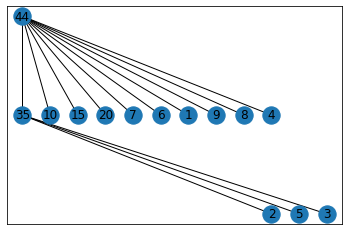

In [12]:
A = [1, 2, 3, 4, 7, 5, 6, 10, 9, 8, 15, 20, 35, 44]
start = time.time()
dheap = DHeap(A, num_children=10)
dheap.build_max_heap()
print(f'max {dheap.num_children}-heap: {str(dheap)}')
print(str(dheap))
end = time.time()
print(f'Time taken to heapify list of {len(A)} elements: {end - start} seconds')
DHeap.visualize_heap(dheap)

## Visualization for a min 10-heap
### (Heap with 10 children on all non-leaf nodes)

min 10-heap: [1, 2, 3, 4, 7, 5, 6, 10, 9, 8, 15, 20, 35, 44]
[1, 2, 3, 4, 7, 5, 6, 10, 9, 8, 15, 20, 35, 44]
Time taken to heapify list of 14 elements: 0.0005059242248535156 seconds
Adding edge between 1 and 2
Adding edge between 1 and 3
Adding edge between 1 and 4
Adding edge between 1 and 7
Adding edge between 1 and 5
Adding edge between 1 and 6
Adding edge between 1 and 10
Adding edge between 1 and 9
Adding edge between 1 and 8
Adding edge between 1 and 15
Adding edge between 2 and 20
Adding edge between 2 and 35
Adding edge between 2 and 44


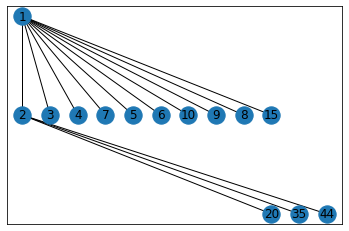

In [13]:
A = [1, 2, 3, 4, 7, 5, 6, 10, 9, 8, 15, 20, 35, 44]
start = time.time()
dheap = DHeap(A, num_children=10)
dheap.build_min_heap()
print(f'min {dheap.num_children}-heap: {str(dheap)}')
print(str(dheap))
end = time.time()
print(f'Time taken to heapify list of {len(A)} elements: {end - start} seconds')
DHeap.visualize_heap(dheap)